# Phase 3 
In this phase, we applied two unsupervised learning algorithms — Gaussian Mixture Models (GMM) and Hierarchical Clustering  to uncover hidden patterns in the dataset without relying on labeled outputs.

We selected these approaches because:

Hierarchical Clustering builds a tree-like structure of clusters, enabling us to explore the relationships between users at different levels of granularity. It also does not require predefining the number of clusters, although we used 3 to match other methods for comparison.

GMM is well-suited for datasets where clusters may overlap, as it models each cluster as a probability distribution rather than enforcing hard boundaries. This allows for more flexible and realistic grouping of users.

After applying both methods, we compared their clusters against the actual Diet_Recommendation labels. The results showed that GMM outperformed Hierarchical Clustering, with a higher percentage alignment between its clusters and the dietary labels — indicating that GMM captured the natural structure of the data more effectively.

Previously, we had considered using K-Means Clustering, but we ultimately moved away from it because it assumes non-overlapping, spherical clusters — a limitation that made it less suitable for our dataset.

We began this phase by applying the Elbow Method to determine the optimal number of clusters for data set.
By plotting the inertia (WCSS) for different values of K (from 1 to 10), we looked for a point where the decrease in inertia slows down( the elbow).In our plot, this elbow appeared at K = 3, indicating that 3 clusters is a good balance between model complexity and cluster compactness.

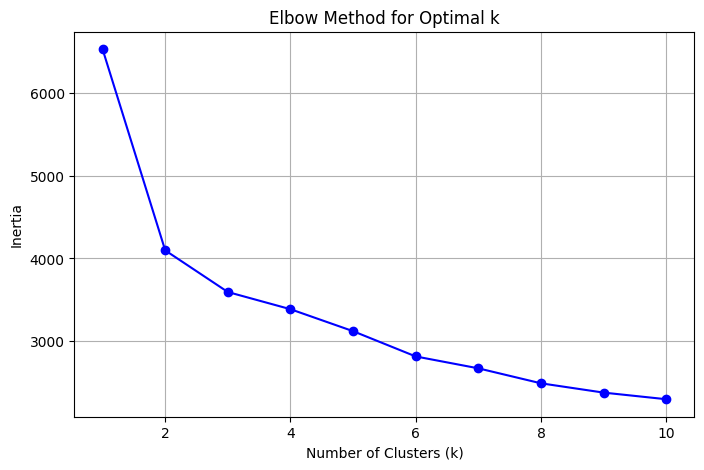

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np




# Load your dataset
df = pd.read_csv('dataset_preprocessed (3) (2).csv')

# Drop the 'Cluster' column if it exists (from previous runs)
if 'Cluster' in df.columns:
    df = df.drop('Cluster', axis=1)

# Select features (all except Diet_Recommendation since it's the target)
features = df.drop('Diet_Recommendation', axis=1)

# Elbow Method to choose the best K
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## Hierarchical Clustering (Agglomerative)

In [2]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Hierarchical Clustering (Agglomerative)
# We chose 3 clusters 
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(features)


# Preview the first few rows with cluster assignments

print(" First few rows with Hierarchical cluster assignments:")
display(df[['Gender', 'Disease_Type', 'Physical_Activity_Level',
          'Age_Range', 'BMI_Range', 'Calorie_Range',
          'Diet_Recommendation', 'Hierarchical_Cluster']].head(10))

# Compare clusters with Diet Recommendations
# This shows how diet labels are distributed within each cluster

print("\n Hierarchical Cluster vs. Diet Recommendation Distribution (in %):")
Hierarchical_Cluster_summary = df.groupby('Hierarchical_Cluster')['Diet_Recommendation'].value_counts(normalize=True) * 100
print(Hierarchical_Cluster_summary.round(2))



 First few rows with Hierarchical cluster assignments:


,Gender,Disease_Type,Physical_Activity_Level,Age_Range,BMI_Range,Calorie_Range,Diet_Recommendation,Hierarchical_Cluster
0,1,2,1,4,1,2,0,0
1,1,0,1,5,2,2,1,0
2,0,1,2,3,1,0,2,2
3,1,3,1,2,1,1,0,1
4,1,0,2,5,1,2,1,0
5,0,2,0,1,3,1,0,1
6,1,3,0,6,2,1,0,0
7,1,0,1,2,0,0,1,1
8,1,2,0,4,1,1,0,0
9,1,1,0,6,1,1,2,0



 Hierarchical Cluster vs. Diet Recommendation Distribution (in %):
Hierarchical_Cluster  Diet_Recommendation
0                     0                      56.99
                      2                      25.89
                      1                      17.12
1                     0                      50.74
                      2                      27.57
                      1                      21.69
2                     1                      46.99
                      2                      46.99
                      0                       6.02
Name: proportion, dtype: float64


## Gaussian Mixture Clustering

In [3]:
#Apply Gaussian Mixture with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(scaled_features)


# Preview the first few rows with cluster assignments
print(" First few rows with Gaussian Mixture cluster assignments:")
display(df[['Gender', 'Disease_Type', 'Physical_Activity_Level',
          'Age_Range', 'BMI_Range', 'Calorie_Range',
          'Diet_Recommendation', 'GMM_Cluster']].head(10))

# Compare clusters with Diet Recommendations
# This shows how diet labels are distributed within each cluster
print("\n Gaussian Mixture Cluster vs. Diet Recommendation Distribution (in %):")
GMM_cluster_summary = df.groupby('GMM_Cluster')['Diet_Recommendation'].value_counts(normalize=True) * 100
print(GMM_cluster_summary.round(2))


 First few rows with Gaussian Mixture cluster assignments:


,Gender,Disease_Type,Physical_Activity_Level,Age_Range,BMI_Range,Calorie_Range,Diet_Recommendation,GMM_Cluster
0,1,2,1,4,1,2,0,1
1,1,0,1,5,2,2,1,2
2,0,1,2,3,1,0,2,2
3,1,3,1,2,1,1,0,1
4,1,0,2,5,1,2,1,2
5,0,2,0,1,3,1,0,0
6,1,3,0,6,2,1,0,0
7,1,0,1,2,0,0,1,2
8,1,2,0,4,1,1,0,0
9,1,1,0,6,1,1,2,0



 Gaussian Mixture Cluster vs. Diet Recommendation Distribution (in %):
GMM_Cluster  Diet_Recommendation
0            0                       44.48
             2                       32.54
             1                       22.99
1            0                      100.00
2            2                       53.35
             1                       46.65
Name: proportion, dtype: float64


Silhouette Score for Hierarchical Clustering: 0.1384
Silhouette Score for GMM: 0.1236


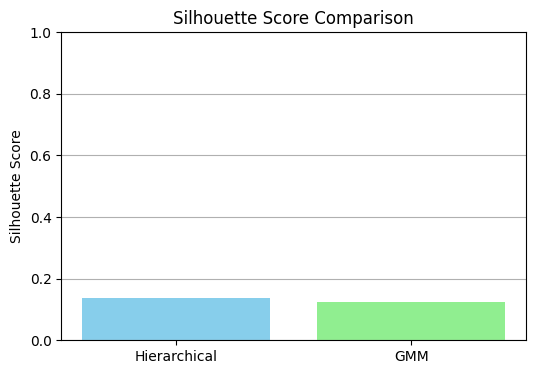

In [4]:
# Keep only original features for distance calculation
features = df.drop(columns=['Hierarchical_Cluster', 'GMM_Cluster'])

# Compute silhouette scores
silhouette_hierarchical = silhouette_score(features, df['Hierarchical_Cluster'])
silhouette_gmm = silhouette_score(features, df['GMM_Cluster'])

# Print the results
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")
print(f"Silhouette Score for GMM: {silhouette_gmm:.4f}")


#  Visualization: Bar plot comparison
plt.figure(figsize=(6, 4))
plt.bar(['Hierarchical', 'GMM'], [silhouette_hierarchical, silhouette_gmm], color=['skyblue', 'lightgreen'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


A silhouette score closer to 1 indicates well-separated clusters.
Scores below 0.25 generally indicate weak or overlapping clusters.
In our results:
Hierarchical Clustering: 0.1384 → Very low, clusters are not well separated.
 GMM: 0.1236 → Also low, but slightly better than hierarchical.

 These scores support that : the data does not form strong natural clusters.



BCubed Precision for GMM: 0.591
BCubed Recall for GMM: 0.555
BCubed Precision for Hierarchical Clustering: 0.416
BCubed Recall for Hierarchical Clustering: 0.423


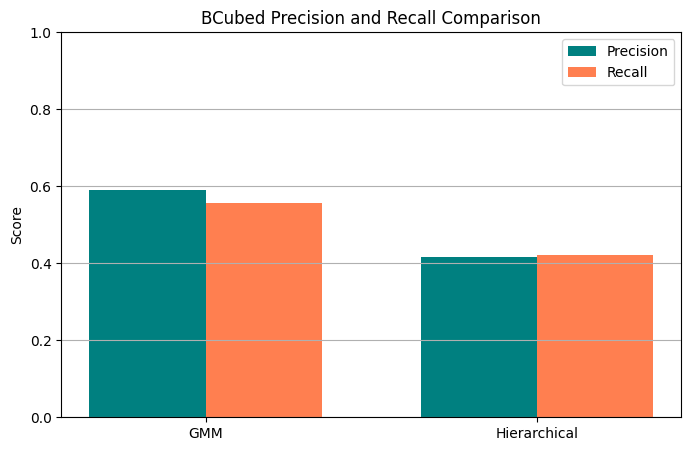

In [5]:
#  Custom function to compute BCubed Precision and Recall
def bcubed_precision_recall(y_true, y_pred):
    n = len(y_true)
    precisions = []
    recalls = []

    for i in range(n):
        same_cluster = [j for j in range(n) if y_pred[i] == y_pred[j]]  # All items in the same predicted cluster
        same_class = [j for j in range(n) if y_true[i] == y_true[j]]    # All items with the same actual label
        intersection = [j for j in same_cluster if y_true[i] == y_true[j]]  # Common elements

        precision_i = len(intersection) / len(same_cluster) if same_cluster else 0
        recall_i = len(intersection) / len(same_class) if same_class else 0

        precisions.append(precision_i)
        recalls.append(recall_i)

    return np.mean(precisions), np.mean(recalls)

#  Apply BCubed to GMM
y_true = df['Diet_Recommendation']
y_pred_gmm = df['GMM_Cluster']

precision_gmm, recall_gmm = bcubed_precision_recall(y_true, y_pred_gmm)
print(f"BCubed Precision for GMM: {precision_gmm:.3f}")
print(f"BCubed Recall for GMM: {recall_gmm:.3f}")

#  Apply BCubed to Hierarchical Clustering
y_pred_hier = df['Hierarchical_Cluster']

precision_hier, recall_hier = bcubed_precision_recall(y_true, y_pred_hier)
print(f"BCubed Precision for Hierarchical Clustering: {precision_hier:.3f}")
print(f"BCubed Recall for Hierarchical Clustering: {recall_hier:.3f}")

#  Visualization: Bar chart for BCubed metrics
labels = ['GMM', 'Hierarchical']
precisions = [precision_gmm, precision_hier]
recalls = [recall_gmm, recall_hier]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, precisions, width, label='Precision', color='teal')
plt.bar(x + width/2, recalls, width, label='Recall', color='coral')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('BCubed Precision and Recall Comparison')
plt.legend()
plt.grid(axis='y')
plt.show()


BCubed Precision & Recall Interpretation:

This bar chart compares **BCubed Precision** and **Recall** for both clustering algorithms:

- **Precision** measures how pure each cluster is (i.e., do members of a cluster mostly belong to the same actual label?).
- **Recall** measures how complete each class is within a cluster (i.e., are all members of a true class grouped together in one cluster?).

 Key Observations:
- **GMM** performed better in both precision (0.591) and recall (0.555) compared to Hierarchical Clustering.
- **Hierarchical Clustering** had lower precision (0.416) and recall (0.423), indicating it created more mixed and fragmented clusters.
- Both methods fall below the ideal range (typically ≥ 0.7), which confirms that:
  - There is **no strong natural clustering** in the dataset.
  - **Unsupervised learning is not ideal** here.

These results further support that **supervised learning would be more effective**, since we already have labeled data (`Diet_Recommendation`) and clustering is not producing consistent, well-separated groups.


WCSS for Hierarchical Clustering: 4674.8983
WCSS for GMM Clustering: 5774.3805


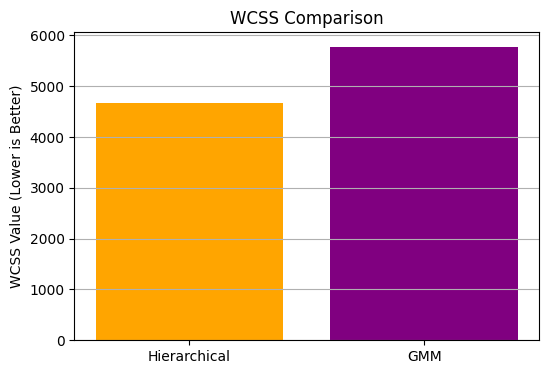

In [6]:
#  Function to compute WCSS (Within-Cluster Sum of Squares)
def compute_wcss(data, labels):
    unique_clusters = np.unique(labels)
    wcss = 0
    for cluster in unique_clusters:
        cluster_points = data[labels == cluster]  # Get all points in the cluster
        centroid = cluster_points.mean(axis=0)    # Compute the centroid
        wcss += np.sum((cluster_points - centroid) ** 2)  # Sum of squared distances
    return wcss

#  Compute WCSS for Hierarchical Clustering
wcss_hierarchical = compute_wcss(
    df.drop(columns=['Hierarchical_Cluster', 'GMM_Cluster']).values,
    df['Hierarchical_Cluster'].values
)

#  Compute WCSS for GMM
wcss_gmm = compute_wcss(
    df.drop(columns=['Hierarchical_Cluster', 'GMM_Cluster']).values,
    df['GMM_Cluster'].values
)

#  Print the results
print(f"WCSS for Hierarchical Clustering: {wcss_hierarchical:.4f}")
print(f"WCSS for GMM Clustering: {wcss_gmm:.4f}")

#  WCSS Bar Chart for Visual Comparison
plt.figure(figsize=(6, 4))
plt.bar(['Hierarchical', 'GMM'], [wcss_hierarchical, wcss_gmm], color=['orange', 'purple'])
plt.title('WCSS Comparison')
plt.ylabel('WCSS Value (Lower is Better)')
plt.grid(axis='y')
plt.show()


WCSS measures how compact each cluster is.
Lower WCSS = better (tighter, more cohesive clusters).
Here, Hierarchical Clustering has LOWER WCSS than GMM,
suggesting its clusters are more compact.
BUT: this doesn't mean it's better overall because GMM had better Silhouette and BCubed scores.

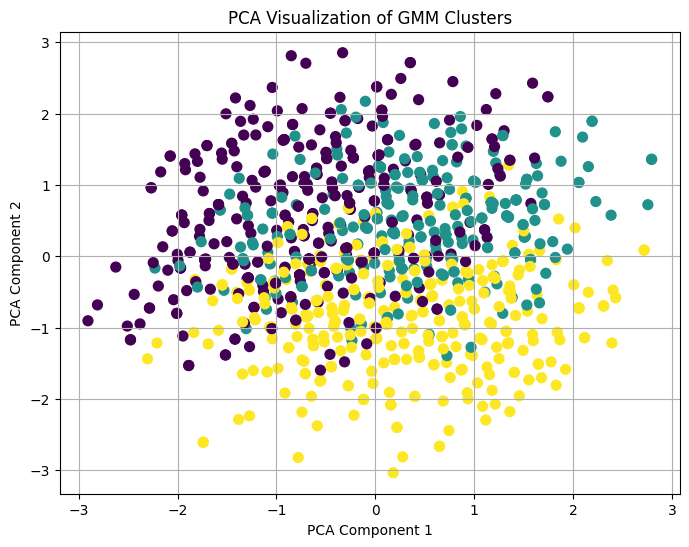

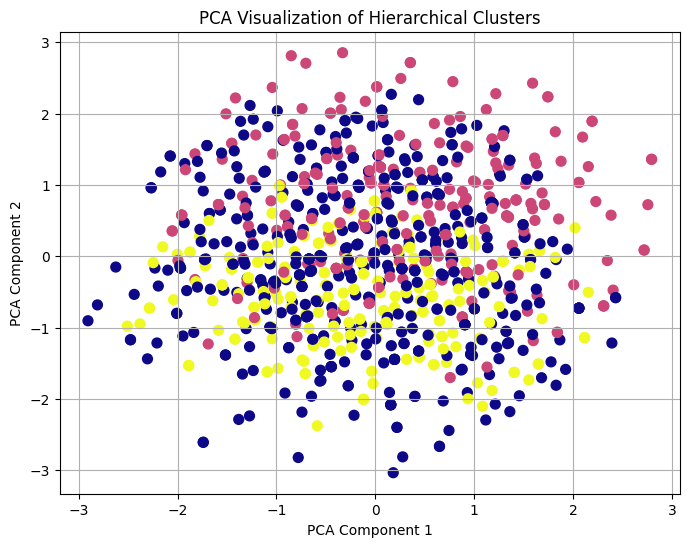

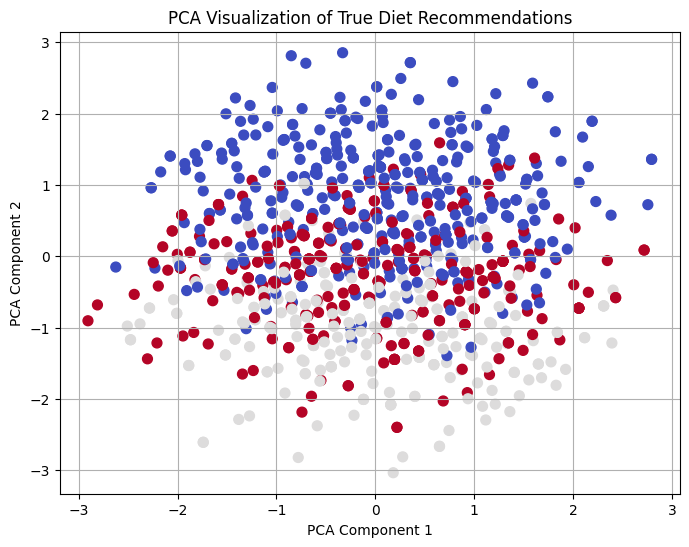

In [7]:
# Step 1: Select only the features (drop labels and clusters)
features = df.drop(columns=['Diet_Recommendation', 'GMM_Cluster', 'Hierarchical_Cluster'])

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# GMM
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['GMM_Cluster'], cmap='viridis', s=50)
plt.title('PCA Visualization of GMM Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Hierarchical
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Hierarchical_Cluster'], cmap='plasma', s=50)
plt.title('PCA Visualization of Hierarchical Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# True Labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Diet_Recommendation'], cmap='coolwarm', s=50)
plt.title('PCA Visualization of True Diet Recommendations')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


PCA Visualization Summary

PCA was applied to reduce the high-dimensional feature space into two principal components for easy visualization of clustering results.
In graph 1&2 Each color represents a predicted cluster by the algorithm.
In graph 3 Each color represents the true class label.

 Key Takeaways:
- **GMM Clusters** show slightly better separation, with one visible group standing out.
- **Hierarchical Clusters** are more scattered and show poor separation.
- **True Labels** (`Diet_Recommendation`) are also overlapped, confirming that the dataset doesn’t naturally group well.

This validates our conclusion: while GMM performs relatively better than Hierarchical Clustering, **neither method achieves strong clustering**, and supervised learning should be preferred.




Clustering was applied in an attempt to improve supervised learning by incorporating unsupervised patterns as additional features. However, this approach resulted in a decrease in model accuracy from 97% to 92%.

\n SVM Model Performance (With GMM Cluster):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      0.69      0.82        52
           2       0.80      1.00      0.89        63

    accuracy                           0.92       200
   macro avg       0.93      0.90      0.90       200
weighted avg       0.94      0.92      0.92       200

Accuracy: 0.9200


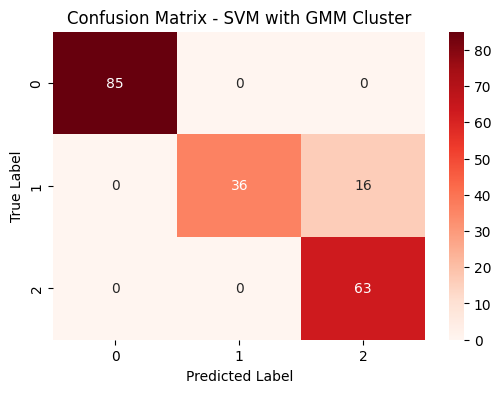

In [9]:
# Merge the full code blocks together into a single complete script


from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define new feature set with GMM_Cluster
feature_cols_with_gmm = [
    'Gender', 'Disease_Type', 'Physical_Activity_Level',
    'Age_Range', 'BMI_Range', 'Calorie_Range',
    'GMM_Cluster'  # added cluster feature
]
X_gmm = df[feature_cols_with_gmm]
y = df['Diet_Recommendation']

# Train/test split
X_train_gmm, X_test_gmm, y_train_gmm, y_test_gmm = train_test_split(
    X_gmm, y, test_size=0.2, random_state=1, stratify=y
)

# Retrain SVM on new features
svm_model_gmm = SVC(kernel='rbf', C=0.07, gamma="auto", random_state=42)
svm_model_gmm.fit(X_train_gmm, y_train_gmm)
y_pred_svm_gmm = svm_model_gmm.predict(X_test_gmm)

# Evaluate new SVM model
print("\\n SVM Model Performance (With GMM Cluster):")
print(classification_report(y_test_gmm, y_pred_svm_gmm))
print(f"Accuracy: {accuracy_score(y_test_gmm, y_pred_svm_gmm):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_gmm, y_pred_svm_gmm), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - SVM with GMM Cluster")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()